#NEURAL NETWORK REGRESSION

Regression is the problem of predicting a number of some sort.

In this notebook:

* Architecture of a regression model
* Input shapes and output shapes
  * X: features/data (inputs)
  * y: labels (outputs)
* Creating custom data to view and fit
* Steps in modelling
* Creating a model
* Compiling a model
  * Defining a loss function
  * Setting up an optimizer
  * Creating evaluation metrics
* Fitting a model (getting it to find patterns in our data)
* Evaluating a model
  * Visualizng the model ("visualize, visualize, visualize")
  * Looking at training curves
  * Compare predictions to ground truth (using our evaluation metrics)
* Saving a model (so we can use it later)
* Loading a model

In [ ]:
# Import TensorFlow
import tensorflow as tf
import tensorflow_probability as tfp

print(tf.__version__)

2.12.0


###Creating data to fit and view

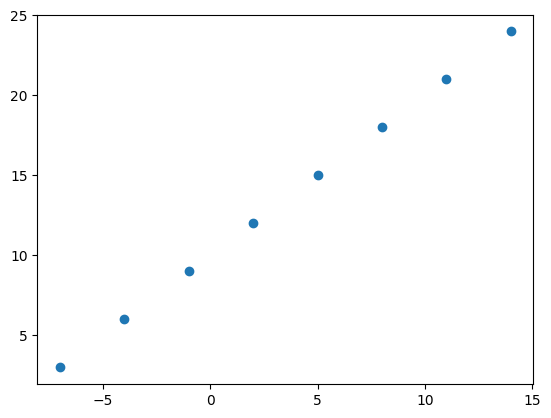

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels

y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it
plt.scatter(X,y )

In [ ]:
y == X+10  # the relation we want to learn

array([ True,  True,  True,  True,  True,  True,  True,  True])

###Input and Output Shapes

In [ ]:
# Create a demo tensor for the problem

input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
# Turn our NumPy arrays to tensors

X = tf.cast(tf.constant(X),dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

##Steps in Modelling with Tensorflow

1. Creating a model - define the i/p and o/p layers, as well as hidden layers
2. Compiling the model - define loss function, the optimizer, and evaluation metric
3. Fit the model - let the model find patterns

In [ ]:
# Set random seed
tf.random.set_seed(42)

#1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# another way
# model = tf.keras.Sequential()
# model.add.(tf.keras.Dense(1))

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 18.8635 - mae: 18.8635
Epoch 2/5
1/1 [==============================] - 0s 34ms/step - loss: 18.5823 - mae: 18.5823
Epoch 3/5
1/1 [==============================] - 0s 32ms/step - loss: 18.3010 - mae: 18.3010
Epoch 4/5
1/1 [==============================] - 0s 24ms/step - loss: 18.0198 - mae: 18.0198
Epoch 5/5
1/1 [==============================] - 0s 49ms/step - loss: 17.7385 - mae: 17.7385


In [ ]:
# making prediction

model.predict([17.0])

1/1 [==============================] - 0s 347ms/step


array([[-15.29617]], dtype=float32)

We are nowhere close to the ground truth.

Let's try to improve the model.

##Improving the model

1. Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. Compiling a model - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
3. Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# let's try to increase the number of epochs


# Set random seed
tf.random.set_seed(42)

#1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# another way
# model = tf.keras.Sequential()
# model.add.(tf.keras.Dense(1))

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 11.0799 - mae: 11.0799
Epoch 2/100
1/1 [==============================] - 0s 37ms/step - loss: 10.9474 - mae: 10.9474
Epoch 3/100
1/1 [==============================] - 0s 54ms/step - loss: 10.8149 - mae: 10.8149
Epoch 4/100
1/1 [==============================] - 0s 27ms/step - loss: 10.6824 - mae: 10.6824
Epoch 5/100
1/1 [==============================] - 0s 38ms/step - loss: 10.5499 - mae: 10.5499
Epoch 6/100
1/1 [==============================] - 0s 38ms/step - loss: 10.4174 - mae: 10.4174
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 10.2849 - mae: 10.2849
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 10.1524 - mae: 10.1524
Epoch 9/100
1/1 [==============================] - 0s 38ms/step - loss: 10.0199 - mae: 10.0199
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 9.8874 - mae: 9.8874
Epoch 11/100
1/1 [==============================] - 0

In [ ]:
# making prediction

model.predict([17.0])

1/1 [==============================] - 0s 145ms/step


array([[29.832106]], dtype=float32)

Much better

In [ ]:
# Let's try to use Adam optimizer

# Set random seed
tf.random.set_seed(42)

#1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# another way
# model = tf.keras.Sequential()
# model.add.(tf.keras.Dense(1))

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 20.6965 - mae: 20.6965
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 20.6898 - mae: 20.6898
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 20.6830 - mae: 20.6830
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 20.6763 - mae: 20.6763
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 20.6695 - mae: 20.6695
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 20.6628 - mae: 20.6628
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 20.6560 - mae: 20.6560
Epoch 8/100
1/1 [==============================] - 0s 38ms/step - loss: 20.6493 - mae: 20.6493
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 20.6425 - mae: 20.6425
Epoch 10/100
1/1 [==============================] - 0s 29ms/step - loss: 20.6358 - mae: 20.6358
Epoch 11/100
1/1 [==============================] -

In [ ]:
# making prediction

model.predict([17.0])

1/1 [==============================] - 0s 119ms/step


array([[-23.954123]], dtype=float32)

Better

In [ ]:
# Let's try to use extra layeer

# Set random seed
tf.random.set_seed(42)

#1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

# another way
# model = tf.keras.Sequential()
# model.add.(tf.keras.Dense(1))

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.3416 - mae: 12.3416
Epoch 2/100
1/1 [==============================] - 0s 35ms/step - loss: 12.2592 - mae: 12.2592
Epoch 3/100
1/1 [==============================] - 0s 27ms/step - loss: 12.1767 - mae: 12.1767
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 12.0942 - mae: 12.0942
Epoch 5/100
1/1 [==============================] - 0s 27ms/step - loss: 12.0116 - mae: 12.0116
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 11.9291 - mae: 11.9291
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 11.8467 - mae: 11.8467
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 11.7650 - mae: 11.7650
Epoch 9/100
1/1 [==============================] - 0s 24ms/step - loss: 11.6834 - mae: 11.6834
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 11.6024 - mae: 11.6024
Epoch 11/100
1/1 [==============================] -

In [ ]:
# making prediction

model.predict([17.0])

1/1 [==============================] - 1s 609ms/step


array([[24.518663]], dtype=float32)

Even Better

We can try to check with different model parameters and see how the prediction varies.

##Evaluating the model

Visualization is an important tool for visualization

In [ ]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
y = np.arange(-90, 110, 4)
X,y

(array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96]),
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106]))

In [ ]:
# Split data into train; test; and valid dataset

import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

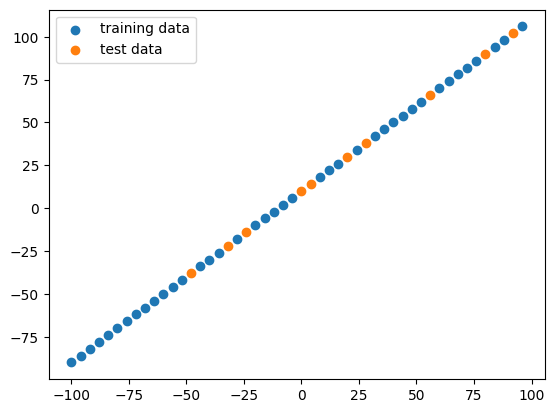

In [ ]:
# Visualize the data


plt.figure()
plt.scatter(X_train, y_train, label='training data')
plt.scatter(X_test, y_test, label='test data')
plt.legend()

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)      # defining the input shape argument, the model builds automatically. We can use model.build() otherwise to build the model.
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1])     # Dense layer is a fully connected layer.
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model
model.fit(X_train, y_train, epochs=100, verbose = 0)      # Verbose = 0 hides the annoying cell output.

In [ ]:
# Visualizing the Model

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total parameters are the total parameters in the model.

* Trainable parameters are the parameters(patterns) the model can update as it trains.

* Non-Trainable parameters are parameters(patterns) the model can't update as it trains. This is typical when you bring in already learned patterns or parameters from other models during transfer learning.

In [ ]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 95ms/step


array([[-30.725626 ],
       [ 38.372086 ],
       [ 14.453646 ],
       [ 54.31771  ],
       [-20.09521  ],
       [ 62.290524 ],
       [  3.823229 ],
       [  1.1656249],
       [ 19.768854 ],
       [-14.780001 ]], dtype=float32)

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 541ms/step - loss: 16.5767 - mae: 16.5767


[16.57674789428711, 16.57674789428711]

The loss and metric values of the new model are given above.

Not bad

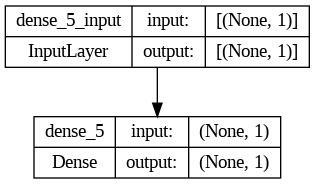

In [ ]:
# Another way of visualizing the model

from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes = True)

In [ ]:
# New model

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)      # defining the input shape argument, the model builds automatically. We can use model.build() otherwise to build the model.
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name = "Input_Layer"),     # Dense layer is a fully connected layer.
  tf.keras.layers.Dense(1, name = "Output_Layer")
], name ="model_1")

# Compile model (same as above)
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fit model
model_1.fit(X_train, y_train, epochs=100, verbose = 0)      # Verbose = 0 hides the annoying cell output.

In [ ]:
# Visualizing the Model

model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 10)                20        
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


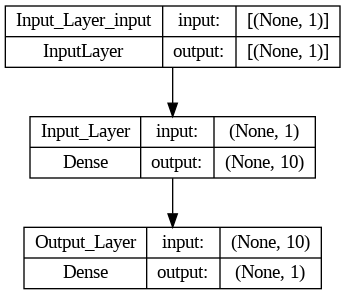

In [ ]:
# Another way of visualizing the model

from tensorflow.keras.utils import plot_model

plot_model(model = model_1, show_shapes = True)

In [ ]:
y_pred_1 = model_1.predict(X_test)
y_pred_1

1/1 [==============================] - 0s 72ms/step


array([[-43.87504   ],
       [ 52.156467  ],
       [ 18.914791  ],
       [ 74.31758   ],
       [-29.100962  ],
       [ 85.39815   ],
       [  4.1407146 ],
       [  0.44719535],
       [ 26.30183   ],
       [-21.71392   ]], dtype=float32)

In [ ]:
model_1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 159ms/step - loss: 10.9013 - mae: 10.9013


[10.90131950378418, 10.90131950378418]

###Visualizing Our Model's Prediction

Tu visualize predictions, it's a good idea to plot them agains the ground truth labels.

Often you'll see this in the form of y_test or y_true versus y_pred (ground truth vs your prediction)

In [ ]:
# Let's create a plotting function

def plot_predictions (train_data = X_train,
                      train_labels = y_train,
                      test_data = X_test,
                      test_labels = y_test,
                      predictions = y_pred):
  plt.figure()
  plt.scatter(train_data,train_labels, label = "Training Data")
  plt.scatter(test_data,test_labels, label = "Test Data")
  plt.scatter(test_data,predictions, label = "Predictions")
  plt.legend()

SGD MODEL


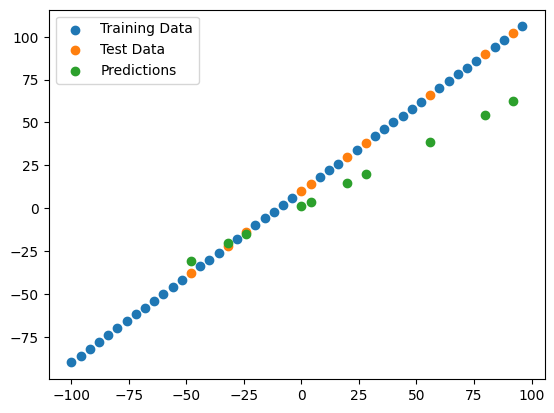

In [ ]:
print("SGD MODEL")
plot_predictions(X_train,y_train,X_test,y_test,y_pred)

Not That Good

Adam MODEL - MAE


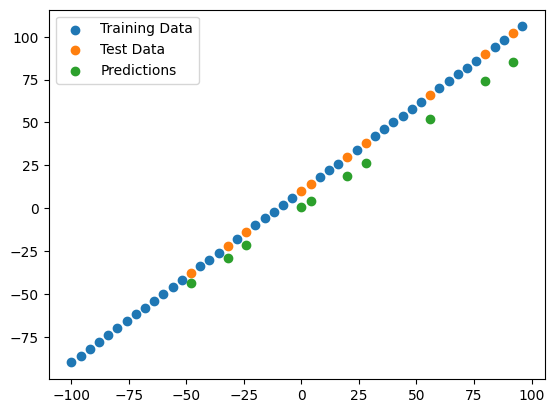

In [ ]:
print("Adam MODEL - MAE")
plot_predictions(X_train,y_train,X_test,y_test,y_pred_1)

Pretty Good!!

We can use different **evaluation metrics** as follow:

* Mean Absolute Error[MAE] (Great Stater Metric)
* Mean Square Error[MSE] (Great for outliers, when larger errors are more significant than smaller errors)
* Huber (Combibnation of MAE and MSE, less sensitive eto outlier than MSE)

In [ ]:
# New model

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)      # defining the input shape argument, the model builds automatically. We can use model.build() otherwise to build the model.
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name = "Input_Layer"),     # Dense layer is a fully connected layer.
  tf.keras.layers.Dense(1, name = "Output_Layer")
], name ="model_2")

# Compile model (same as above)
model_2.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mse"])

# Fit model
model_2.fit(X_train, y_train, epochs=100, verbose = 0)      # Verbose = 0 hides the annoying cell output.
y_pred_2 = model_2.predict(X_test)

1/1 [==============================] - 0s 70ms/step


Adam MODEL - MSE


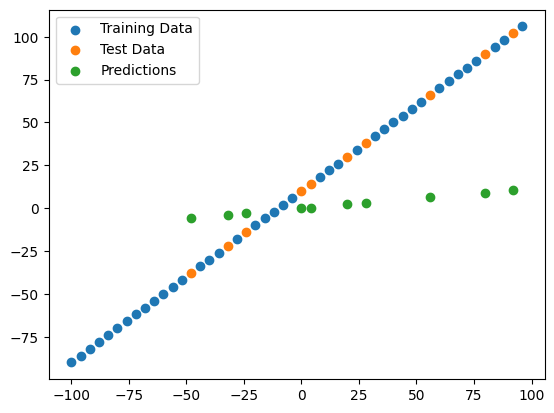

In [ ]:
print("Adam MODEL - MSE")
plot_predictions(X_train,y_train,X_test,y_test,y_pred_2)

In [ ]:
# New model

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)      # defining the input shape argument, the model builds automatically. We can use model.build() otherwise to build the model.
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name = "Input_Layer"),     # Dense layer is a fully connected layer.
  tf.keras.layers.Dense(1, name = "Output_Layer")
], name ="model_3")

# Compile model (same as above)
model_3.compile(loss=tf.keras.losses.Huber(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit model
model_3.fit(X_train, y_train, epochs=100, verbose = 0)      # Verbose = 0 hides the annoying cell output.
y_pred_3 = model_3.predict(X_test)

1/1 [==============================] - 0s 60ms/step


Adam MODEL - Huber


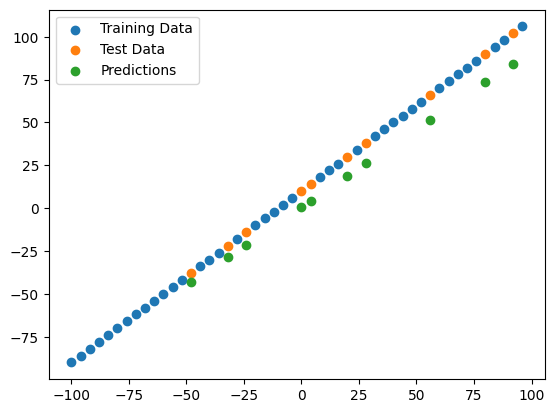

In [ ]:
print("Adam MODEL - Huber")
plot_predictions(X_train,y_train,X_test,y_test,y_pred_3)

MSE seems to work the best.

In [ ]:
# Make some functions to reruse MAE and MSE

def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)

def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)


### To improve the model, we can get more data, modify the structure of the model (maybe use complex structure in the form of more layers, or mor hidden units in the model) or maybe train for longer.

##Saving The Model

model_3 is performing best so far

let's save it

In [ ]:
# Save a model using the HDF5 format

model_3.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

# Can also be saved by using the following method
# Save a model using the SavedModel format
# model_23.save('best_model_SavedModel_format')

In [ ]:
# Check it out if it exists
!ls best_model_HDF5_format.h5

# Or check if you used SaveModel format
# !ls best_model_SavedModel_format

best_model_HDF5_format.h5


##Loading The Model

In [ ]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

# Or Load a model from the SavedModel format
#loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
# loaded_saved_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (Dense)         (None, 10)                20        
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


###You can also download the model from Google Colab using the following method

In [ ]:
# Download the model (or any file) from Google Colab
# from google.colab import files
# files.download("best_model_HDF5_format.h5")

# A LARGER EXAMPLE

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
# categorical to numerical
# One-hot encoding

insurance_one_hot = pd.get_dummies(insurance)

In [ ]:
# Create X & y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42) # set random state for reproducible splits

###Building a model

In [ ]:
# New model

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)      # defining the input shape argument, the model builds automatically. We can use model.build() otherwise to build the model.
model_insurance = tf.keras.Sequential([
  tf.keras.layers.Dense(10, name = "Input_Layer"),     # Dense layer is a fully connected layer.
  tf.keras.layers.Dense(1, name = "Output_Layer")
], name ="model_insurance")

# Compile model (same as above)
model_insurance.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fit model
history = model_insurance.fit(X_train, y_train, epochs=100, verbose = 0)      # Verbose = 0 hides the annoying cell output.
y_pred_insurance = model_insurance.predict(X_test)

9/9 [==============================] - 0s 2ms/step


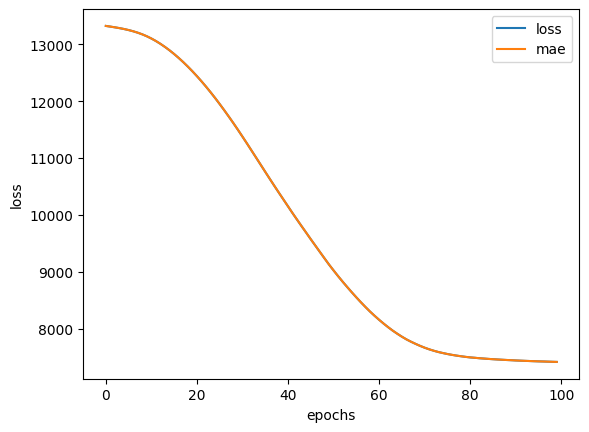

In [ ]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
# Check the results of the insurance model
model_insurance.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7559.6094 - mae: 7559.6094


[7559.609375, 7559.609375]

Welp, it did not perfom good.

Let's try something else.

####Improving the model

We can try

* Adding extra layers.
* Training for longer.
* Changing the optimizer (from SGD to Adam).

In [ ]:
# New model

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)      # defining the input shape argument, the model builds automatically. We can use model.build() otherwise to build the model.
model_insurance_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, name = "Input_Layer"),     # Dense layer is a fully connected layer.
  tf.keras.layers.Dense(10, name = "Middle_Layer"),
  tf.keras.layers.Dense(1, name = "Output_Layer")
], name ="model_insurance_2")

# Compile model (same as above)
model_insurance_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fit model
history = model_insurance_2.fit(X_train, y_train, epochs=100, verbose = 0)      # Verbose = 0 hides the annoying cell output.
y_pred_insurance_2 = model_insurance_2.predict(X_test)
# Check the results of the insurance model
model_insurance_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4943.9609 - mae: 4943.9609


[4943.9609375, 4943.9609375]

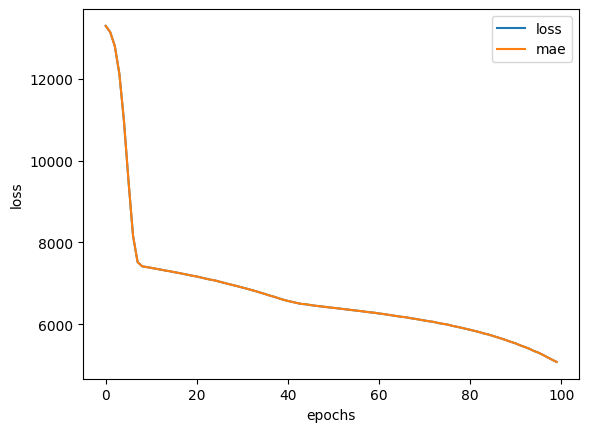

In [ ]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
# New model

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)      # defining the input shape argument, the model builds automatically. We can use model.build() otherwise to build the model.
model_insurance_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, name = "Input_Layer"),     # Dense layer is a fully connected layer.
  tf.keras.layers.Dense(10, name = "Middle_Layer"),
  tf.keras.layers.Dense(1, name = "Output_Layer")
], name ="model_insurance_3")

# Compile model (same as above)
model_insurance_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fit model
history = model_insurance_3.fit(X_train, y_train, epochs=250, verbose = 0)      # Verbose = 0 hides the annoying cell output.
y_pred_insurance_3 = model_insurance_3.predict(X_test)
# Check the results of the insurance model
model_insurance_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3342.5757 - mae: 3342.5757


[3342.57568359375, 3342.57568359375]

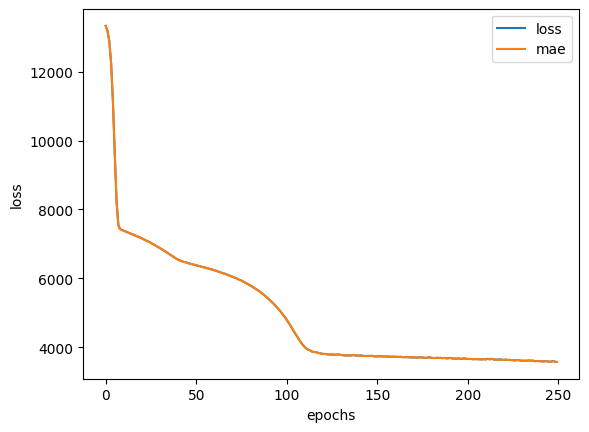

In [ ]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

This seems the better one among all the models we've built for this example.

We can use **Early Stopping Callback** to early stop if the model doesn't improve significantly and we don't want to train it any further then.

###Preprocessing Data

A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called normalization (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call standardization which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:

* Turning all of your data to numbers (a neural network can't handle strings).
* Making sure your data is in the right shape (verifying input and output shapes).
* Feature scaling:
  * Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minmum. This is also referred to as min-max scaling.
  * Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by substracting the mean value from the target feature and then dividing it by the standard deviation.


Which one should you use?

* With neural networks you'll tend to favour normalization as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# New model

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)      # defining the input shape argument, the model builds automatically. We can use model.build() otherwise to build the model.
model_insurance_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, name = "Input_Layer"),     # Dense layer is a fully connected layer.
  tf.keras.layers.Dense(10, name = "Middle_Layer"),
  tf.keras.layers.Dense(1, name = "Output_Layer")
], name ="model_insurance_4")

# Compile model (same as above)
model_insurance_4.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fit model
history = model_insurance_4.fit(X_train_normal, y_train, epochs=250, verbose = 0)      # Verbose = 0 hides the annoying cell output.
y_pred_insurance_4 = model_insurance_4.predict(X_test_normal)
# Check the results of the insurance model
model_insurance_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3159.1824 - mae: 3159.1824


[3159.182373046875, 3159.182373046875]

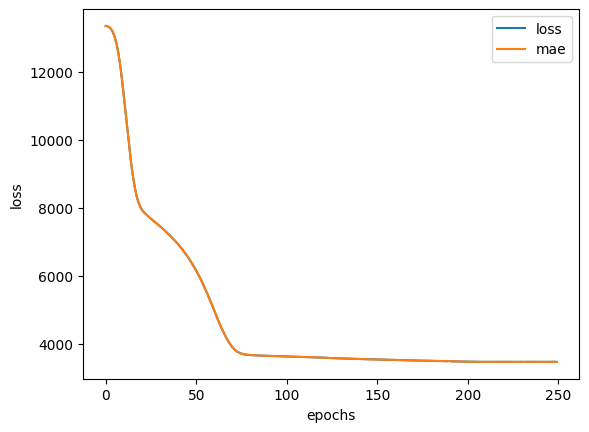

In [ ]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

This is our **Best Result**.